In [1]:
using DynamicalSystems, CairoMakie,  DifferentialEquations, OrdinaryDiffEq
using StaticArrays

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [3]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k1= -0.17; k2 = -0.17;
k = 0.0
condition = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
# condition = SA[-0.5, -0.5, -0.5, -0.5, 0-0.5, -0.5]

p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2, k]

12-element SVector{12, Float64} with indices SOneTo(12):
  1.0
  3.0
  1.0
  5.0
  5.0
 -1.6
  0.01
  4.0
  2.0
 -0.17
 -0.17
  0.0

In [15]:
p = [a, b, c, d, s, xr, r, I, xv, k1, k2, k]
ds_HR = ContinuousDynamicalSystem(HR,  condition, p )

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.17, -0.17, 0.0]

In [6]:
xg1 = yg1 = zg1 =  xg2 = yg2 = zg2 = range(-5.5, 5.5; length = 20)

-5.5:0.5789473684210527:5.5

In [16]:
mapper = AttractorsViaRecurrences(ds_HR, (xg1, yg1, zg1, xg2, yg2, zg2);
                                    mx_chk_hit_bas = 20,
                                    mx_chk_fnd_att  = 200,
                                    mx_chk_loc_att  = 200,
                                    mx_chk_lost  = 500,
                                    diffeq = (alg = Vern9(),
                                                abstol = 1e-11, reltol = 1e-11, dense = false,  maxiters = 10000000))

┌ Info: Automatic Δt estimation yielded Δt = 0.1064802082180636
└ @ ChaosTools C:\Users\olenin.s\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:238


AttractorsViaRecurrences
 rule f:      HR
 type:        ODEIntegrator
 attractors:  Dict{Int16, Dataset{6, Float64}}()
 grid:        (-5.5:0.5789473684210527:5.5, -5.5:0.5789473684210527:5.5, -5.5:0.5789473684210527:5.5, -5.5:0.5789473684210527:5.5, -5.5:0.5789473684210527:5.5, -5.5:0.5789473684210527:5.5)


In [ ]:
basins, attractors = basins_of_attraction(mapper)
attractors

┌ Info: AttractorsViaRecurrences found new attractor with id: 1
└ @ ChaosTools C:\Users\olenin.s\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:412
Basins of attraction:   0%|█                            |  ETA: 1 days, 17:17:54

In [11]:
save("basins_step_grid_20.jld", "data", basins)
save("attractors_step_grid_20.jld", "data", attractors)

LoadError: UndefVarError: basins not defined

In [53]:
COLORS = [
    "#1B1B1B",
    "#6D44D0",
    "#2CB3BF",
    "#DA5210",
    "#03502A",
    "#866373",
    "white",
    "blue",
]

8-element Vector{String}:
 "#1B1B1B"
 "#6D44D0"
 "#2CB3BF"
 "#DA5210"
 "#03502A"
 "#866373"
 "white"
 "blue"

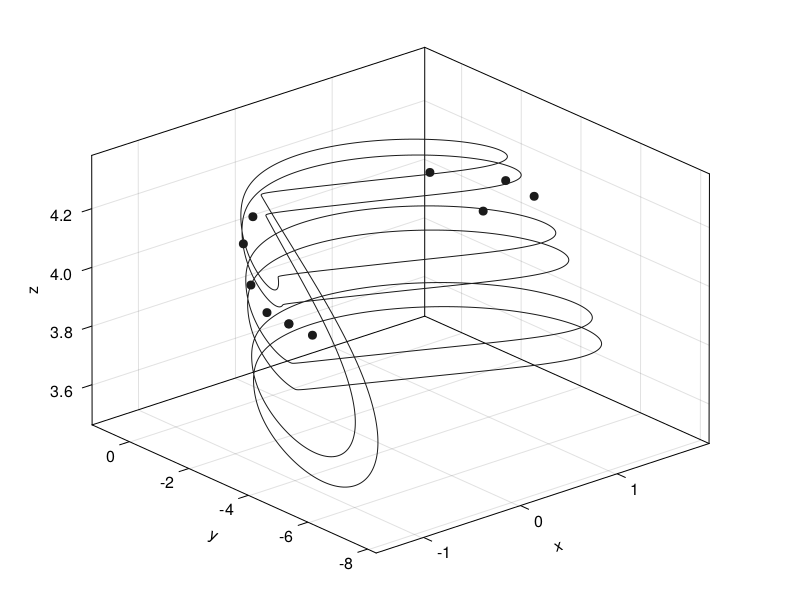

In [54]:
fig = Figure()
ax = Axis3(fig[1,1])

for i in keys(attractors)
    
    tr = attractors[i]
    color = COLORS[i]
    
    idxs = [1,2,3]
    
    x,y,z = columns(tr)[idxs]
    scatter!(ax, x,y,z; color =color)
    
    tr = trajectory(ds_HR, 5000, tr[1]; Ttr = 1000, diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000) )
    
    x,y,z = columns(tr)[idxs]
    
    lines!(ax, x,y,z; linewidth = 1.0, color = color)

end

fig